# 迴歸模型練習

In [1]:
from sklearn import linear_model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X, y = make_regression(n_samples=200, n_features=1, noise=3, random_state=66)

Text(0.5, 1.0, 'Data Visualization')

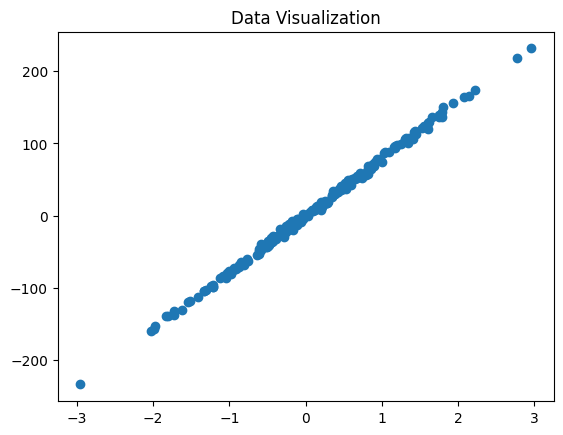

In [3]:
# 資料視覺化
plt.scatter(X, y)
plt.title('Data Visualization')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

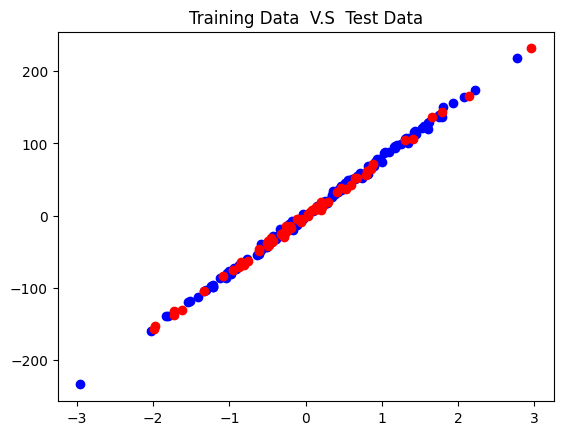

In [5]:
#藍點為訓練集資料，紅點為測試集資料
plt.scatter(X_train, y_train, color= 'blue')
plt.scatter(X_test, y_test, color= 'red')
plt.title('Training Data  V.S  Test Data')
plt.show()

### 簡單線性迴歸

In [6]:
regr = linear_model.LinearRegression().fit(X_train, y_train)

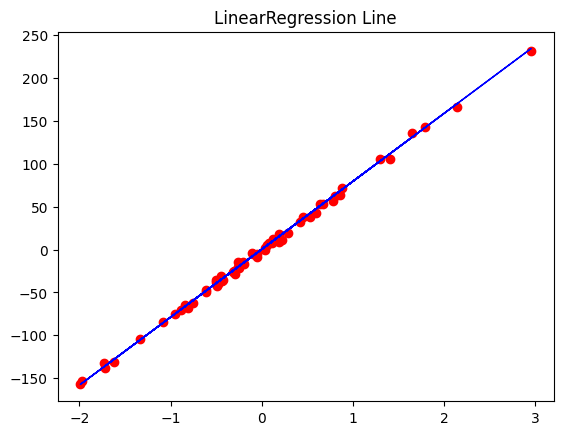

In [7]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test, regr.predict(X_test), color = 'blue', linewidth=1)
plt.title('LinearRegression Line')
plt.show()

### `regr.intercept_` 和 `regr.coef_` 使用

**`regr.intercept_` (截距)**
   - **定義**：表示當自變數（輸入特徵，通常記為 \( X \)）的值為 0 時，目標變數（輸出，通常記為 \( Y \)）的預測值。
   - **意義**：這是回歸線與 \( Y \)-軸的交點，代表基本的偏移量。

**`regr.coef_` (係數，或稱斜率)**
   - **定義**：表示每個自變數對目標變數的影響，即當自變數增加 1 單位時，目標變數的變化量。
   - **意義**：它描述了迴歸線的斜率，數值越大，影響越顯著。
   - **注意**：如果有多個自變數（多元迴歸），`regr.coef_` 會是一個陣列，表示每個特徵對 \( Y \) 的影響。

In [8]:
w_0 = regr.intercept_
w_1 = regr.coef_
print(f'截距 = {w_0}')
print(f'係數（斜率）= {w_1}')

截距 = 0.30712628134945064
係數（斜率）= [79.23650786]


---
### 1. 數值解釋：
- **截距（\( w_0 \)）= 0.30712628134945064**  
  當自變數（輸入特徵 \( X \)）的值為 0 時，目標變數（輸出 \( Y \)）的預測值為 **0.3071**（四捨五入到小數點後四位）。

- **斜率（\( w_1 \)）= [79.23650786]**  
  當自變數 \( X \) 增加 1 單位時，目標變數 \( Y \) 增加 **79.23650786** 單位。
### ２. 模型的迴歸公式：
\[
Y = 79.23650786．X + 0.3071
\]
### ３. 應用案例：
- 如果 \( X = 0 \)：  
  \[
  Y = 0.3071 （即截距）
  \]
- 如果 \( X = 1 \)：  
  \[
  Y = 79.23650786．1 + 0.3071 =  79.54360786
  \]
### ４. 結論：
- 此模型顯示 \( X \) 對 \( Y \) 有很大的影響，斜率 **79.23650786** 表示 \( X \) 每增加 1 單位，\( Y \) 會增長 79.23650786。
- 截距值相對較小，說明當 \( X = 0 \) 時，\( Y = 0.3071 \) 基礎值不大。

---

### R平方

In [9]:
train_R2 = regr.score(X_train, y_train)
print(f'Training data R平方 = {train_R2}')
print('\n')
print('訓練集資料，R平方，越高越好，表示準確程度越高')

Training data R平方 = 0.9985022529438589


訓練集資料，R平方，越高越好，表示準確程度越高


In [10]:
test_R2 = regr.score(X_test, y_test)
print(f'Test data R平方 = {test_R2}')
print('\n')
print('測試集資料，R平方，越高越好，表示準確程度越高')

Test data R平方 = 0.998094924977807


測試集資料，R平方，越高越好，表示準確程度越高


---
## Gradient Decent 梯度下降法

### 變數和設定的意義

1. **`alpha = 0.001`**
   - **學習率（Learning Rate）：**
     - 控制每次參數更新的步伐大小。
     - 學習率太小會導致收斂過慢，太大可能會導致不穩定或跳過最優解。

2. **`repeats = 100`**
   - **最大迭代次數：**
     - 梯度下降法的循環次數，表示更新參數的次數。
     - 目的是逐漸讓參數 \( w_0 \) 和 \( w_1 \) 收斂到損失函數的最小值。

3. **`w0 = 0` 和 `w1 = 0`**
   - **初始化參數：**
     - 梯度下降法需要從某個初始值開始，這裡將 \( w_0 \) 和 \( w_1 \) 都設為 0。
     - 初始值對收斂速度可能有影響，但在凸問題中最終結果不會改變。

4. **`error = []`**
   - **誤差列表：**
     - 用於記錄每次迭代的損失函數值（誤差），方便分析收斂過程。
     - 常見損失函數包括均方誤差（MSE）。

5. **`point = []`**
   - **參數記錄：**
     - 用於記錄每次迭代時的參數值 \( (w_0, w_1) \)。
     - 方便可視化參數的變化過程，觀察梯度下降的軌跡。

In [11]:
alpha = 0.001 #learning rate 學習率
repeats = 10000 #迭代次數(梯度下降法的循環次數)

# Initializing variables 初始化參數
w0 = 0  
w1 = 0  
errors = [] #用於記錄每次迭代的損失函數值（誤差）
points = [] #用於記錄每次迭代時的參數值

In [12]:
for j in range(repeats):
    error_sum = 0
    squared_error_sum = 0
    error_sum_x = 0
    for i in range(len(X_train)):
        predict = w0 + (X_train[i] * w1)
        squared_error_sum = squared_error_sum + (y_train[i] - predict) ** 2
        error_sum = error_sum + (y_train[i] - predict)
        error_sum_x = error_sum_x + (y_train[i] - predict) * X_train[i]
    w0 = w0 + (alpha * error_sum)
    w1 = w1 + (alpha * error_sum_x)
    errors.append(squared_error_sum / len(X_train))

print('w0: %2f' % w0)
print('w1: %2f' % w1)

w0: 0.307126
w1: 79.236508


/var/folders/2k/sw8w3mj923v232q1s3ltrpjm0000gn/T/ipykernel_83553/2969938528.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w0: %2f' % w0)
/var/folders/2k/sw8w3mj923v232q1s3ltrpjm0000gn/T/ipykernel_83553/2969938528.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w1: %2f' % w1)


In [13]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
    predict = w0 + (X_test[i] * w1)
    predicts.append(predict)

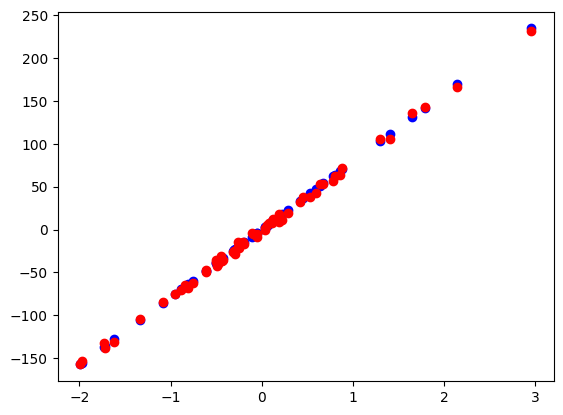

In [14]:
plt.scatter(X_test, predicts, color ='blue')
plt.scatter(X_test, y_test, color='red')
plt.show()

--- 

## Polynomial Regression

In [15]:
import random
# 設定隨機種子
random.seed(33)

# 產生 50 個 1 到 100 之間的小到大隨機數字
# 假設random_numbers_size是房子的坪數、random_numbers_price是房子的價錢
random_numbers_size = sorted(random.sample(range(3, 200), 100))
random_numbers_price = sorted(random.sample(range(500, 9000), 100))

# 顯示隨機數字
print(f'size:{random_numbers_size}')
print(f'price:{random_numbers_price}')

size:[3, 4, 11, 16, 17, 19, 21, 26, 27, 31, 33, 34, 41, 42, 45, 48, 49, 50, 51, 52, 54, 57, 61, 62, 63, 64, 65, 71, 72, 73, 74, 75, 78, 79, 80, 82, 84, 85, 86, 88, 89, 92, 93, 96, 100, 102, 103, 104, 107, 108, 109, 111, 112, 113, 116, 124, 125, 126, 129, 130, 131, 134, 135, 137, 138, 139, 141, 143, 145, 146, 147, 149, 152, 153, 154, 155, 156, 158, 159, 160, 163, 164, 165, 166, 167, 168, 169, 171, 175, 177, 178, 179, 181, 186, 188, 190, 191, 193, 195, 197]
price:[605, 611, 617, 680, 710, 768, 836, 841, 879, 883, 886, 1008, 1048, 1070, 1150, 1556, 1671, 1780, 1788, 1844, 1933, 1953, 1960, 2010, 2103, 2142, 2229, 2347, 2423, 2600, 2601, 2632, 2749, 2762, 3050, 3174, 3246, 3325, 3342, 3535, 3590, 3754, 3761, 3812, 3827, 3938, 4234, 4235, 4348, 4733, 4769, 4929, 4942, 5083, 5115, 5188, 5259, 5568, 5666, 5703, 5738, 5805, 5824, 5854, 5889, 5947, 5981, 5985, 6056, 6293, 6504, 6533, 6585, 6836, 6854, 7006, 7158, 7273, 7291, 7415, 7513, 7610, 7623, 7767, 7870, 7987, 8038, 8080, 8099, 8241, 8374

In [16]:
series_dict={'X':random_numbers_size, 'y':random_numbers_price}
df = pd.DataFrame(series_dict)
X = df[['X']]
y = df[['y']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=33)

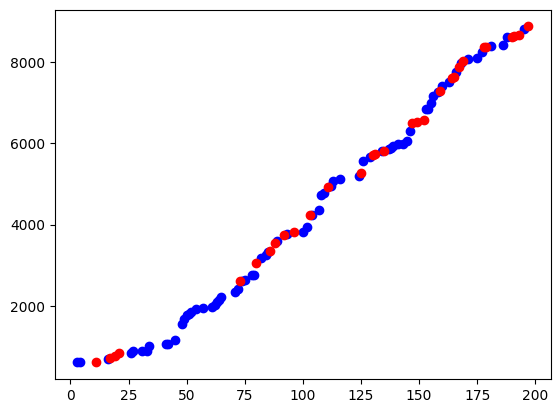

In [18]:
#藍點為訓練集資料，紅點為測試集資料
plt.scatter(X_train, y_train, color = 'blue')
plt.scatter(X_test, y_test, color = 'red')

In [19]:
model = make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [20]:
X_test_sorted = X_test.sort_values(by='X')
y_pred_sorted = model.predict(X_test_sorted)

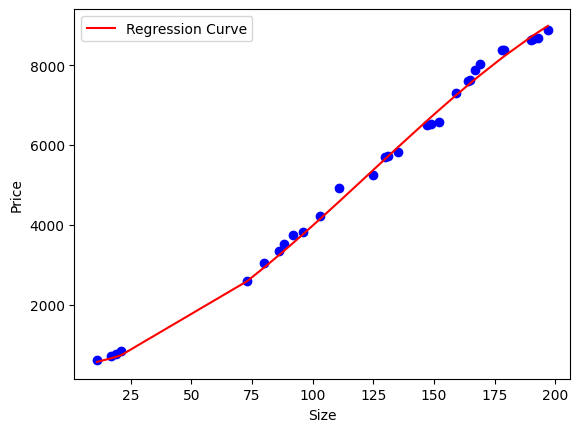

In [21]:
# 繪製回歸曲線
plt.scatter(X_test, y_test,color = 'blue')
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Regression Curve')

# 添加圖例和標籤
plt.xlabel("Size")
plt.ylabel("Price")
plt.legend()
plt.show()

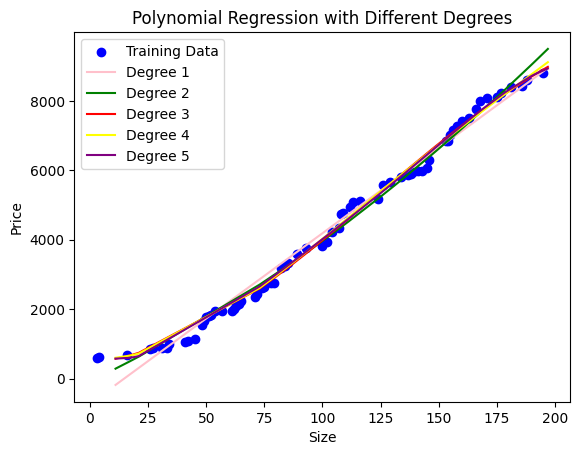

Degree 1: R^2 score = 0.99
Degree 2: R^2 score = 0.99
Degree 3: R^2 score = 1.00
Degree 4: R^2 score = 1.00
Degree 5: R^2 score = 1.00


In [22]:
#使用迴圈的方式測試在幾次方的時候效果最好
#訓練多個模型並繪圖
degrees = [1, 2, 3, 4, 5]
colors = [ 'pink', 'green', 'red', 'yellow', 'purple']  # 為每個 degree 指定顏色
score = []

plt.scatter(X_train, y_train, color='blue', label='Training Data')

for count, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X_train, y_train)
    score.append(model.score(X_train, y_train))
    
    # 排序測試數據以便於繪圖
    X_test_sorted = X_test.sort_values(by='X')
    y_pred_sorted = model.predict(X_test_sorted)
    
    # 使用正確的 color 參數
    plt.plot(X_test_sorted, y_pred_sorted, color=colors[count], label=f'Degree {degree}')

# 添加圖例與標籤
plt.legend(loc='upper left')
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Polynomial Regression with Different Degrees")
plt.show()

# 顯示每個模型的 R^2 分數
for degree, r2 in zip(degrees, score):
    print(f'Degree {degree}: R^2 score = {r2:.2f}')

---
## Multivarable Regression 多元回歸 

In [23]:
X, y = make_regression(n_samples= 100 , n_features= 5, noise= 50) #n_features= 5 (五個特徵)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 33)

In [24]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
regr.intercept_

np.float64(-3.6118612190632664)

In [26]:
regr.coef_

array([49.84655614, -6.07382582, 87.06894621, 98.16379189, 95.13825876])

In [27]:
regr.score(X_train, y_train)

0.9272847952776805

In [28]:
regr.score(X_test, y_test)

0.9596989828841259

### 假設房子坪數、房子到市中心距離與房子售價的關係

In [29]:
import random
# 設定隨機種子
random.seed(33)

# 產生 50 個 1 到 100 之間的小到大隨機數字
# 假設random_numbers_size是房子的坪數、random_numbers_distance是房子到市中心距離、random_numbers_price是房子的價錢
random_numbers_size = sorted(random.sample(range(3, 150), 100))
random_numbers_distance = random.sample(range(20,200), 100)
random_numbers_price = sorted(random.sample(range(400, 9000), 100))

# 顯示隨機數字
print(f'size:{random_numbers_size}')
print(f'distance:{random_numbers_distance}')
print(f'price:{random_numbers_price}')

size:[3, 7, 10, 11, 14, 16, 17, 18, 21, 22, 26, 27, 28, 30, 31, 33, 34, 37, 38, 39, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 55, 57, 61, 62, 63, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 96, 97, 98, 99, 100, 101, 102, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 126, 127, 128, 129, 130, 131, 133, 134, 137, 138, 139, 143, 144, 148, 149]
distance:[100, 61, 146, 176, 143, 28, 42, 174, 92, 138, 91, 128, 149, 124, 86, 140, 179, 195, 119, 25, 121, 101, 103, 62, 47, 67, 178, 93, 64, 110, 129, 131, 105, 114, 150, 194, 23, 78, 182, 43, 89, 40, 50, 70, 68, 156, 38, 36, 22, 168, 115, 21, 59, 72, 151, 137, 31, 186, 169, 37, 162, 180, 181, 145, 95, 144, 46, 183, 189, 49, 106, 34, 196, 66, 161, 122, 166, 83, 147, 163, 116, 167, 136, 20, 142, 57, 99, 127, 198, 87, 152, 112, 32, 63, 69, 187, 77, 54, 45, 30]
price:[457, 517, 541, 783, 786, 841, 942, 1077, 1092, 1671, 1688, 1753, 1901, 1940, 1982, 1988, 

In [30]:
series_dict = {'X1':random_numbers_size, 'X2':random_numbers_distance, 'y':random_numbers_price}
df = pd.DataFrame(series_dict)
X = df [['X1','X2']]
y = df[['y']]
df

,X1,X2,y
0,3,100,457
1,7,61,517
2,10,146,541
3,11,176,783
4,14,143,786
...,...,...,...
95,139,187,8556
96,143,77,8602
97,144,54,8701
98,148,45,8853


In [31]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [32]:
R2 = regr.score(X, y)
print(f'R^2 = {R2}')

R^2 = 0.9943674864556942


In [33]:
regr.intercept_ #此數字在實務上不合理

array([-209.65155356])

In [34]:
regr.coef_

array([[61.51893898,  0.78523174]])

### 係數的解讀 

迴歸係數告訴我們每個自變數（`size` 和 `distance`）對目標變數（`price`）的影響：

#### 1. `size` 的影響（坪數對房價的影響）：
- 每增加 **1 單位坪數**，房價平均增加 **61.52 單位**。
- **坪數**對房價的影響較大。

#### 2. `distance` 的影響（距市中心距離對房價的影響）：
- 每增加 **1 單位距離**，房價平均增加 **0.785 單位**。
- **距離**對房價的影響較小。

## Lasso Regression
 - 避免 overfitting 的方法 

In [35]:
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=66)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

In [37]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [38]:
print('Training Score :' ,regr.score(X_train, y_train))
print('Testing Score :' ,regr.score(X_test, y_test))

Training Score : 0.9978848712233008
Testing Score : 0.9976622676734611


In [39]:
clf_lasso = linear_model.Lasso(alpha= 0.5)
clf_lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [40]:
# Score顯示加入Lasso並沒有達成降低 overfitting 的效果
# 加入Lasso後Training Score並沒有下降多少，沒有達成降低overfitting的效果）
print('Lasso Training Score :' ,clf_lasso.score(X_train, y_train))
print('Lasso Testing Score :' ,clf_lasso.score(X_test, y_test))

Lasso Training Score : 0.9978243200565301
Lasso Testing Score : 0.9975724734527188


## Ridge Regression
 - 避免 overfitting 的方法 

In [41]:
clf_ridge = linear_model.Ridge(alpha= 0.5)
clf_ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [42]:
print('Ridge Training Score :' ,clf_ridge.score(X_train, y_train))
print('Ridge Testing Score :' ,clf_ridge.score(X_test, y_test))

Ridge Training Score : 0.9978842935518393
Ridge Testing Score : 0.9976609699809154


In [43]:
# Lasso 多項式模型
model_lasso = make_pipeline(PolynomialFeatures(4),linear_model.Lasso())
model_lasso.fit(X_train, y_train)
print('Lasso Training Score :' ,model_lasso.score(X_train, y_train))
print('Lasso Testing Score :' ,model_lasso.score(X_test, y_test))

Lasso Training Score : 0.997789540949121
Lasso Testing Score : 0.9966396417769664


In [44]:
# Ridge 多項式模型
model_ridge = make_pipeline(PolynomialFeatures(4),linear_model.Ridge())
model_ridge.fit(X_train, y_train)
print('Ridge Training Score :' ,model_ridge.score(X_train, y_train))
print('Ridge Testing Score :' ,model_ridge.score(X_test, y_test))

Ridge Training Score : 0.9999246237463854
Ridge Testing Score : 0.5827629009070809
